In [0]:
!nvidia-smi


Sat May 30 12:29:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    33W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [0]:
import os

path = "/content/gdrive/My Drive"
os.chdir(path)

In [0]:
%cd Coursework2_Chung_Luu

!ls

# phân quyền execute module darknet
!chmod +x ./darknet

/content/gdrive/My Drive/darknetGoogleColab
backup		    DarknetConfig.cmake.in  test.txt
bad.list	    data		    traindata
chart.png	    image_yolov3.sh	    train.txt
CMakeLists.txt	    json_mjpeg_streams.sh   valid.txt
CMakeSettings.json  Makefile		    yolov3-1c-100-max-steps.cfg
coursework_2.ipynb  obj.data		    yolov3-1c-100-max-steps-test.cfg
darknet		    obj.names		    yolov3-5c.log
darknet53.conv.74   predictions.jpg


In [0]:
import glob2
import numpy as np

all_files = []
for ext in ["*.png", "*.jpeg", "*.jpg"]:
  images = glob2.glob(os.path.join("traindata/image/", ext))
  all_files += images

rand_idx = np.random.randint(0, len(all_files), 20)

# Create train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    # if idx not in rand_idx:
    f.write(all_files[idx]+'\n')

# Create valid.txt
with open("valid.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    if idx in rand_idx:
      f.write(all_files[idx]+'\n')

In [0]:
# Create obj.names config file
!echo fault > obj.names


In [0]:
# Config obj.data config file
!echo classes=1 > obj.data
!echo train=train.txt >> obj.data
!echo valid=test.txt >> obj.data
!echo names=obj.names >> obj.data
!echo backup=backup >> obj.data

In [0]:
os.path.exists("obj.data")
os.path.exists("yolov3-1c-100-max-steps.cfg")


True

In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!mkdir backup


mkdir: cannot create directory ‘backup’: File exists


In [0]:
!./darknet detector train obj.data yolov3-1c-100-max-steps.cfg darknet53.conv.74 -dont_show > yolov3-5c.log


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

In [0]:
!ls backup


yolov3-1c-100-max-steps_1000.weights  yolov3-1c-100-max-steps_final.weights
yolov3-1c-100-max-steps_2000.weights  yolov3-1c-100-max-steps_last.weights


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

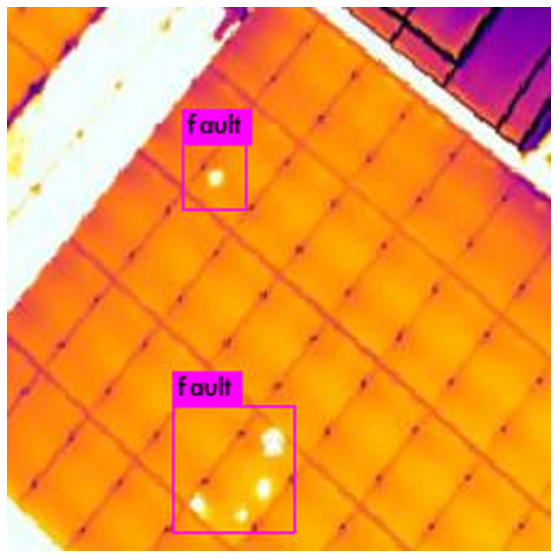

In [0]:
!./darknet detector test obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_last.weights traindata/faulty/image_0_7452.jpeg -thresh 0.3 

imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

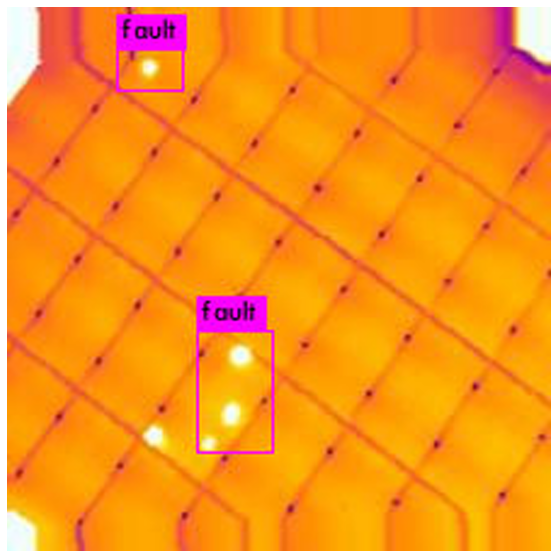

In [0]:
!./darknet detector test obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_1000.weights traindata/faulty/image_0_7880.jpeg -thresh 0.3

imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

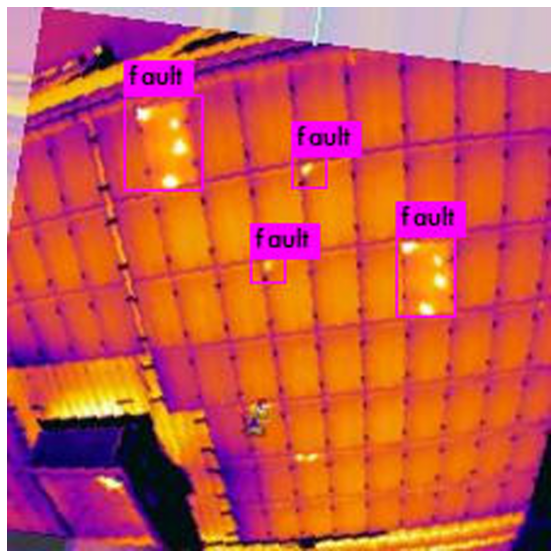

In [0]:
!./darknet detector test obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_final.weights traindata/faulty/image_0_8906.jpeg -dont_show 

imShow('predictions.jpg')

In [0]:
!./darknet detector recall obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_1000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

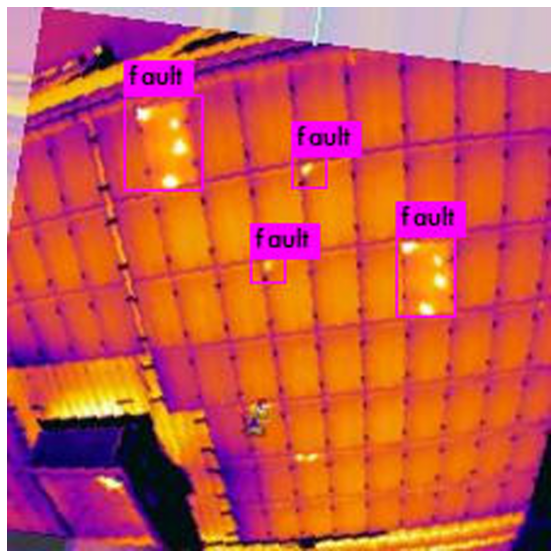

In [0]:
!./darknet detector test obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_last.weights traindata/faulty/image_0_8906.jpeg

imShow('predictions.jpg')

In [0]:
!./darknet detector recall obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_last.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

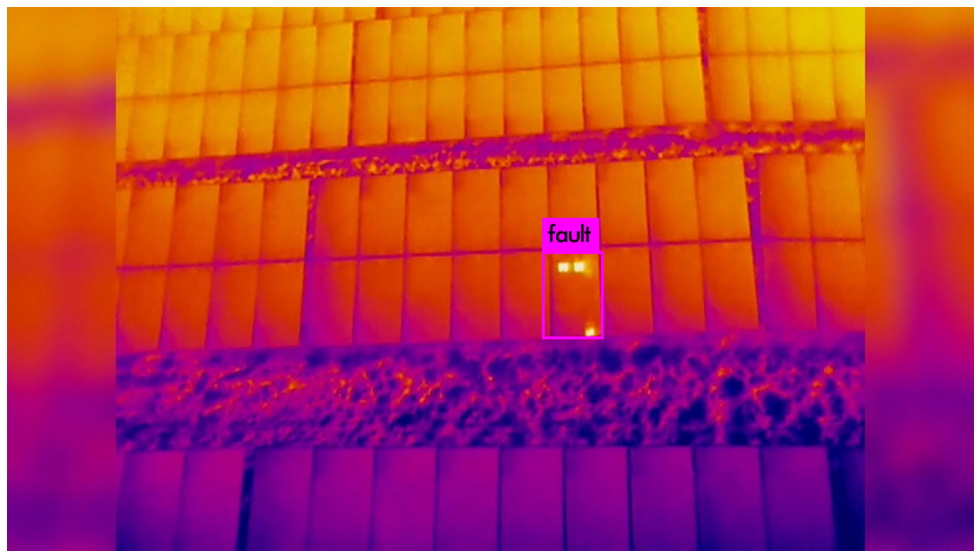

In [0]:
!./darknet detector test obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_last.weights traindata/fault.jpg

imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

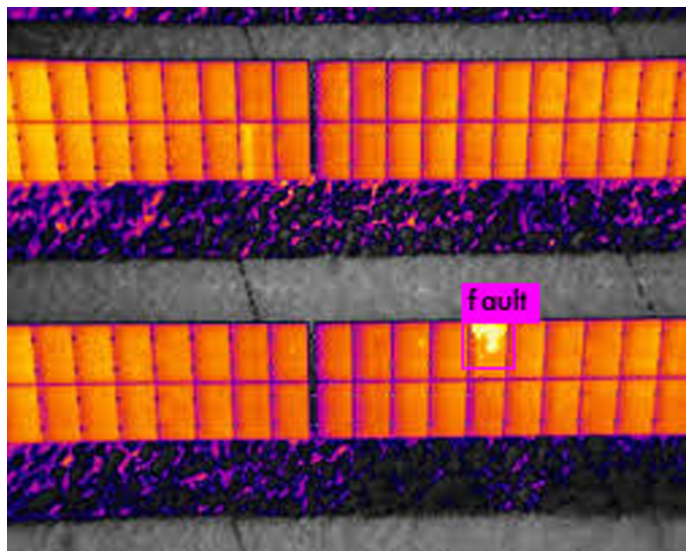

In [0]:
!./darknet detector test obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_last.weights traindata/fault_test.jpg

imShow('predictions.jpg')

In [0]:
!./darknet detector map obj.data yolov3-1c-100-max-steps-test.cfg backup/yolov3-1c-100-max-steps_1000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  32 0.087 BF
   1 conv     64  3 x 3 / 2   224 x 224 x  32   ->   112 x 112 x  64 0.462 BF
   2 conv     32  1 x 1 / 1   112 x 112 x  64   ->   112 x 112 x  32 0.051 BF
   3 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64 0.462 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   112 x 112 x  64   ->    56 x  56 x 128 0.462 BF
   6 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
   7 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1    56 x  56 x 128   ->    56 x  56 x  64 0.051 BF
  10 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128 0.462 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2    56 x  56 x 128   ->    28 x  28 x 256 0.462 BF
  13 conv    128  1 x 1 / 1    28 x  28 x 256   ->    28 x  28 x 128 0.051 BF
  14 c

***MAP = 91.91%***